# **Edge computational resources and security aware serverless application deployment**

## *In this file, the empirical data gathered from the outputs of the source codes has been used to generate the plots and different approaches are compared with respect to their performances.*

 **Scenario- 1 : Success rate of secure deployment of the
serverless application**

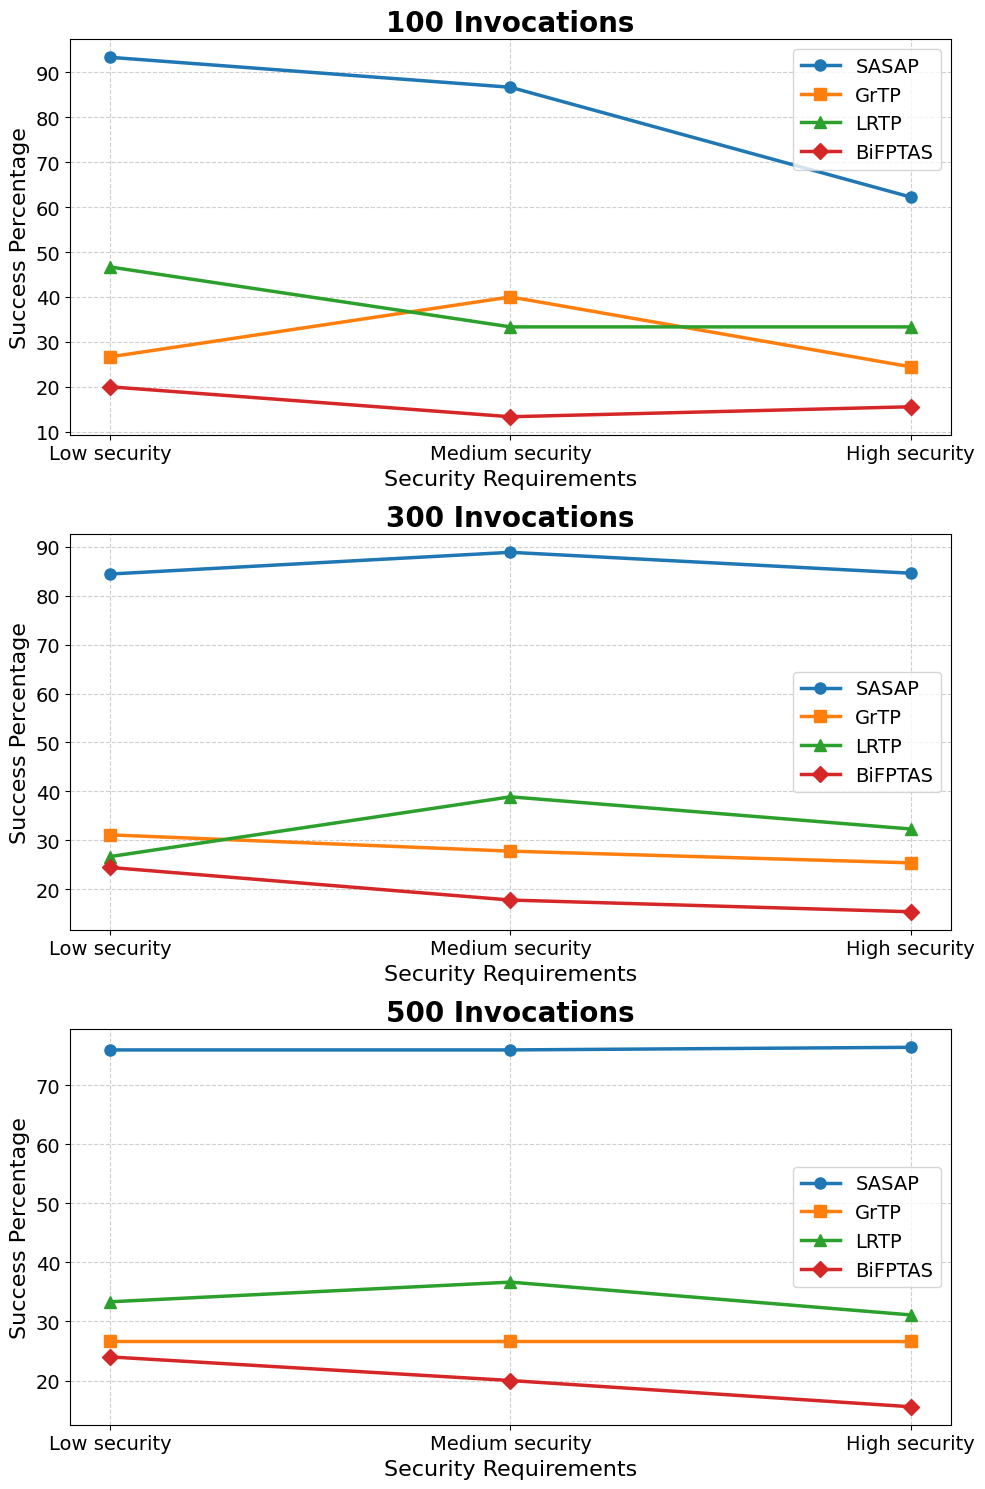

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Use a modern style
plt.style.use("seaborn-v0_8-muted")

# Data for different function invocations
data_100 = {
    'SASAP': [14/15, 26/30, 28/45],
    'GrTP': [4/15, 12/30, 11/45],
    'LRTP': [7/15, 10/30, 15/45],
    'BiFPTAS': [3/15, 4/30, 7/45]
}

data_300 = {
    'SASAP': [38/45, 80/90, 110/130],
    'GrTP': [14/45, 25/90, 33/130],
    'LRTP': [12/45, 35/90, 42/130],
    'BiFPTAS': [11/45, 16/90, 20/130]
}

data_500 = {
    'SASAP': [57/75, 114/150, 172/225],
    'GrTP': [20/75, 40/150, 60/225],
    'LRTP': [25/75, 55/150, 70/225],
    'BiFPTAS': [18/75, 30/150, 35/225]
}

# Security levels for X-axis
security_levels = [0.15, 0.30, 0.45]

# Define distinct markers and colors for algorithms
markers = {'SASAP': 'o', 'GrTP': 's', 'LRTP': '^', 'BiFPTAS': 'D'}
colors = {'SASAP': '#1f77b4', 'GrTP': '#ff7f0e', 'LRTP': '#2ca02c', 'BiFPTAS': '#d62728'}

# Function to plot the data
def plot_data(data, title, ax):
    for algorithm, values in data.items():
        ax.plot(security_levels, [v * 100 for v in values],
                marker=markers[algorithm], markersize=8,
                linestyle='-', linewidth=2.5, color=colors[algorithm], label=algorithm)

    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.set_xlabel("Security Requirements", fontsize=16)
    ax.set_ylabel("Success Percentage", fontsize=16)
    ax.set_xticks(security_levels)
    ax.set_xticklabels(["Low security", "Medium security", "High security"], fontsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=14, loc='best', frameon=True)

# Create the figure and subplots (3 rows × 1 column)
fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # Adjusted width for vertical layout

plot_data(data_100, "100 Invocations", axs[0])
plot_data(data_300, "300 Invocations", axs[1])
plot_data(data_500, "500 Invocations", axs[2])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


**Scenario- 2 : Ensuring serverless application’s
 computational requirements satisfaction**

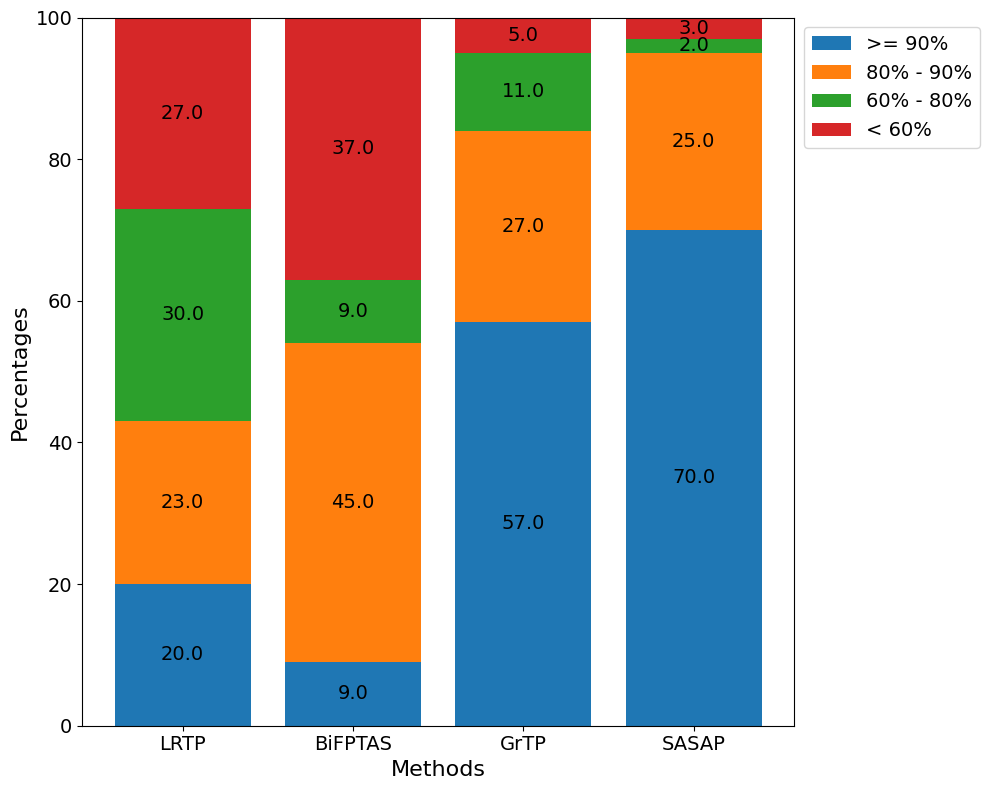

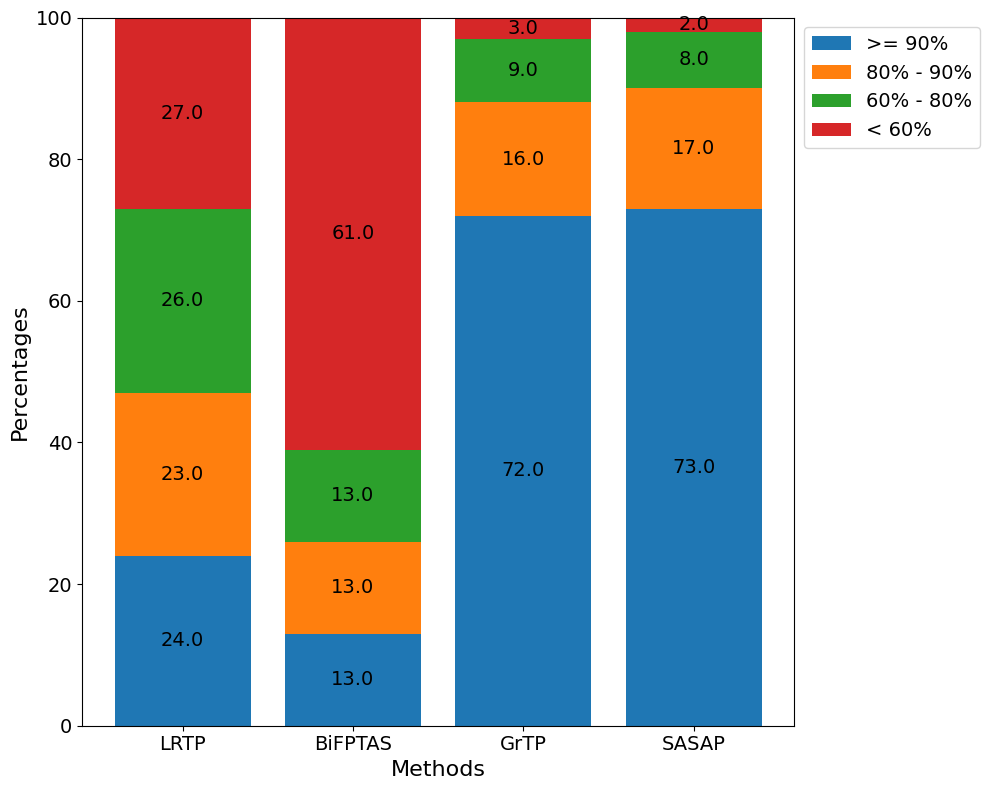

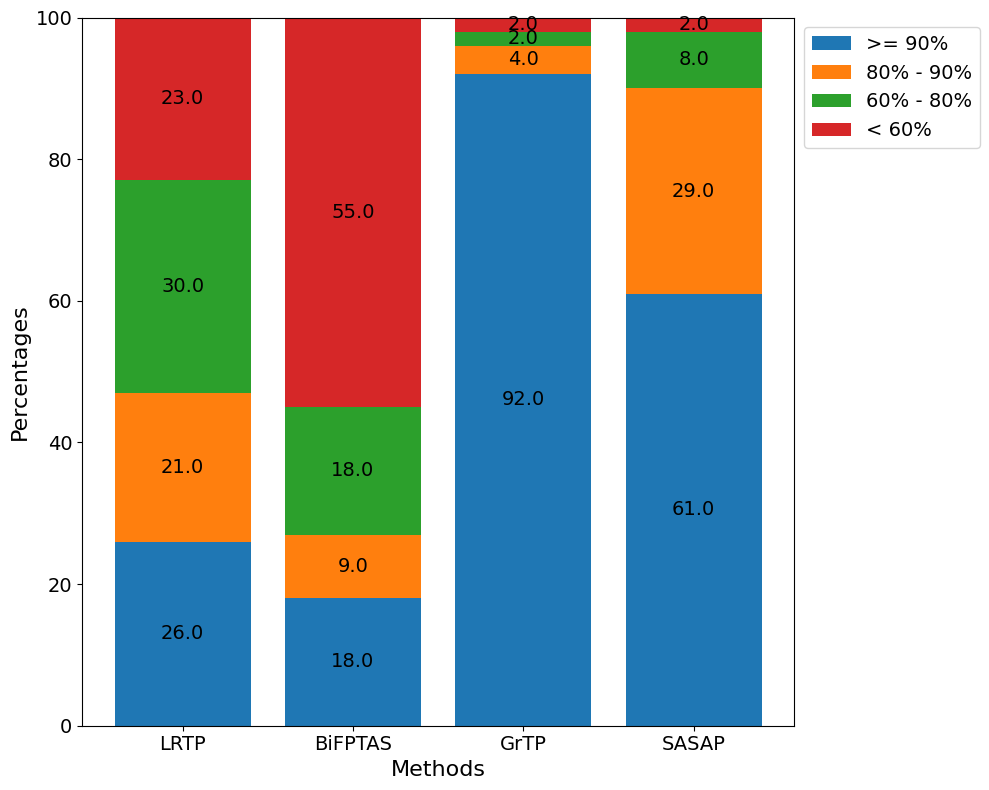

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Data
methods = ['LRTP', 'BiFPTAS', 'GrTP', 'SASAP']
nodes = [100, 300, 500]

qos_data = {
    'LRTP': [[20, 23, 30, 27], [24, 23, 26, 27], [26, 21, 30, 23]],
    'BiFPTAS': [[9, 45, 9, 37], [13, 13, 13, 61], [18, 9, 18, 55]],
    'GrTP': [[57, 27, 11, 5], [72, 16, 9, 3], [92, 4, 2, 2]],
    'SASAP': [[70, 25, 2, 3], [73, 17, 8, 2], [61, 29, 8, 2]]
}

qos_labels = ['>= 90%', '80% - 90%', '60% - 80%', '< 60%']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Create separate figures for each node size
for idx, n in enumerate(nodes):
    fig, ax = plt.subplots(figsize=(10, 8))  # Increased figure size
    bottom = np.zeros(len(methods))

    for i, (qos_label, color) in enumerate(zip(qos_labels, colors)):
        data = [qos_data[m][idx][i] for m in methods]
        bars = ax.bar(methods, data, label=qos_label, color=color, bottom=bottom)

        # Add numbers on top of the bars
        for j, bar in enumerate(bars):
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, bottom[j] + yval / 2,
                    round(yval, 2), ha='center', va='center', fontsize=14, color='black')

        bottom += data

    # ax.set_title(f'Partition Level QoS Satisfaction for N={n} in %.', fontsize=20, fontweight='bold')
    ax.set_title(f'', fontsize=20, fontweight='bold')
    ax.set_ylabel('Percentages', fontsize=16)
    ax.set_xlabel('Methods', fontsize=16)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_ylim(0, 100)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=14)  # Increased font size

    plt.tight_layout()
    plt.show()


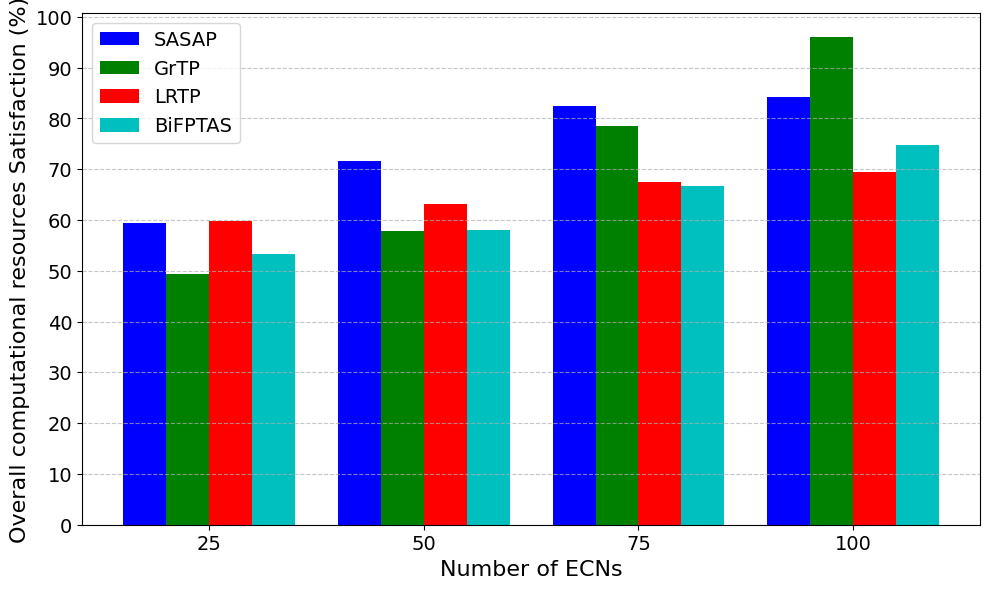

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each approach
ecn_values = [25, 50, 75, 100]

SASAF_qos = [59.33, 71.61, 82.464, 84.25]
GREEDY_qos = [49.35, 57.9, 78.5, 95.98]
LR_qos = [59.9, 63.07, 67.52, 69.55]
BAS_qos = [53.23, 57.97, 66.67, 74.86]

# Set up bar positions (ensure bars don't overlap)
x = np.arange(len(ecn_values))

# Width of each bar
width = 0.2

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each approach as a bar
plt.bar(x - 1.5*width, SASAF_qos, width, label='SASAP', color='b')
plt.bar(x - 0.5*width, GREEDY_qos, width, label='GrTP', color='g')
plt.bar(x + 0.5*width, LR_qos, width, label='LRTP', color='r')
plt.bar(x + 1.5*width, BAS_qos, width, label='BiFPTAS', color='c')

# Add labels and title with increased font sizes
plt.xlabel('Number of ECNs', fontsize=16)
plt.ylabel('Overall computational resources Satisfaction (%)', fontsize=16)
# plt.title('QoS Satisfaction for Different Approaches', fontsize=20, fontweight='bold')
plt.title('', fontsize=20, fontweight='bold')
plt.xticks(x, ecn_values, fontsize=14)
plt.yticks(range(0, 101, 10), fontsize=14)
plt.legend(fontsize=14)

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Scenario- 3 : Ensuring fairness in ECN utilization**

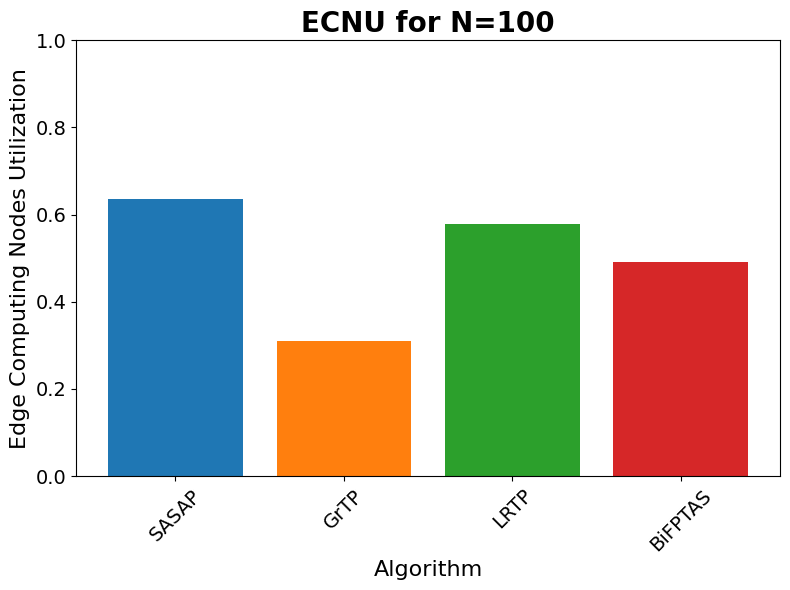

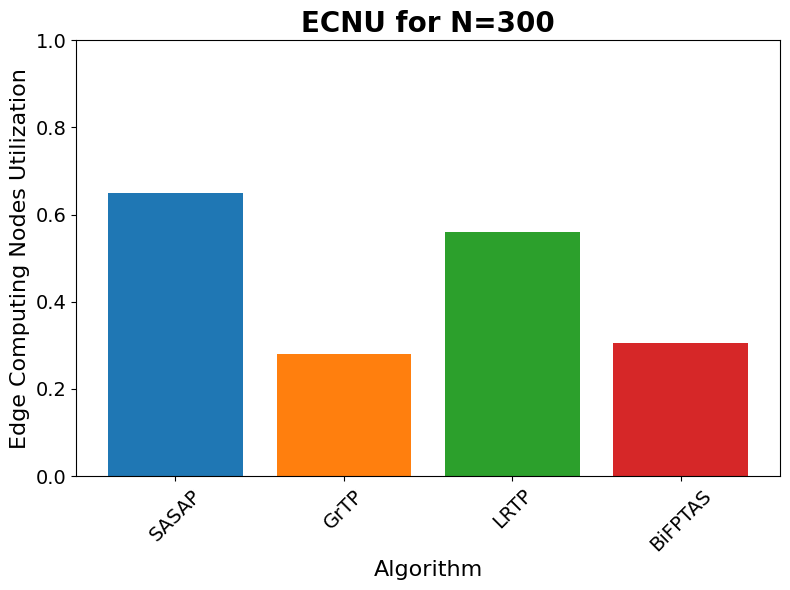

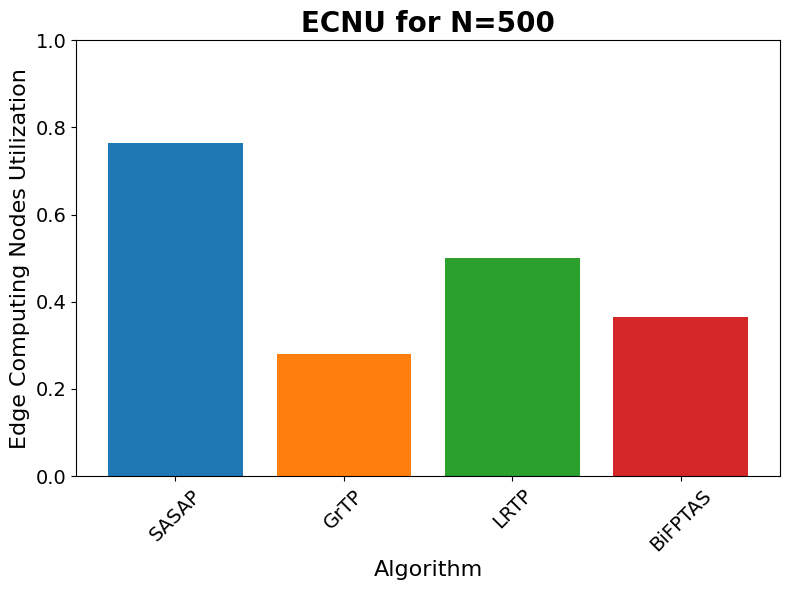

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Data setup
data = {
    'Algorithm': ['SASAP', 'GrTP', 'LRTP', 'BiFPTAS'],
    'N=100': [0.636, 0.309, 0.578, 0.492],
    'N=200': [0.572, 0.311, 0.55, 0.267],
    'N=300': [0.649, 0.28, 0.56, 0.306],
    'N=400': [0.584, 0.121, 0.462, 0.381],
    'N=500': [0.764, 0.28, 0.5, 0.366]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Only plot for selected N values
selected_N_values = ['N=100', 'N=300', 'N=500']

# Loop through selected N values to create separate plots
for N in selected_N_values:
    plt.figure(figsize=(8, 6))
    plt.bar(df['Algorithm'], df[N], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.title(f'ECNU for {N}', fontsize=20, fontweight='bold')
    plt.xlabel('Algorithm', fontsize=16)
    plt.ylabel('Edge Computing Nodes Utilization', fontsize=16)
    plt.ylim(0, 1)  # Keep y-axis consistent across plots
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()
